In [449]:
import sklearn as sk
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [450]:
data = pd.read_csv("dataset.csv")
data["transportation"] = data["transportation"].apply(lambda x: x.strip())
data["goal"] = data["goal"].apply(lambda x: x.strip())
data["location"] = data["location"].apply(lambda x: x.strip())
data["activity"] = data["activity"].apply(lambda x: x.strip())


data.drop(['activity', 'goal', 'location'], 1, inplace = True)

In [451]:
data.head()

,n_people,budget,period,transportation
0,1,3000,2,Car
1,5,23000,6,Taxi
2,4,6000,3,Bus
3,3,3000,5,Metro
4,2,1800,1,Taxi


In [452]:
le = preprocessing.LabelEncoder()
# goal = le.fit_transform(list(data["goal"]))
# n_people = le.fit_transform(list(data["n_people"]))
# budget = le.fit_transform(list(data["budget"]))
# period = le.fit_transform(list(data["period"]))
# location = le.fit_transform(list(data["location"]))
# activity = le.fit_transform(list(data["activity"]))
transportation = le.fit_transform(list(data["transportation"]))

In [453]:
x = list(zip(np.array(data["budget"]), np.array(data["period"]), np.array(data["n_people"])))
y = list(transportation)

In [454]:
max_acc = 0

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size = 0.1)

x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
if acc > max_acc:
    max_acc = acc
    print(max_acc)
#     with open("trans_model.pickle", "wb") as f:
#         pickle.dump(model, f)

0.5


In [455]:
predicted = model.predict(x_test)
names = ["Taxi", "Bus", "Car", "Metro"]
for x in range(len(x_test)):
    print("Predicted: ", names[predicted[x]],
          "Actual: ", names[y_test[x]])

Predicted:  Car Actual:  Car
Predicted:  Bus Actual:  Car
Predicted:  Car Actual:  Bus
Predicted:  Taxi Actual:  Metro
Predicted:  Taxi Actual:  Car
Predicted:  Metro Actual:  Metro
Predicted:  Taxi Actual:  Metro
Predicted:  Bus Actual:  Bus
Predicted:  Taxi Actual:  Taxi
Predicted:  Taxi Actual:  Taxi


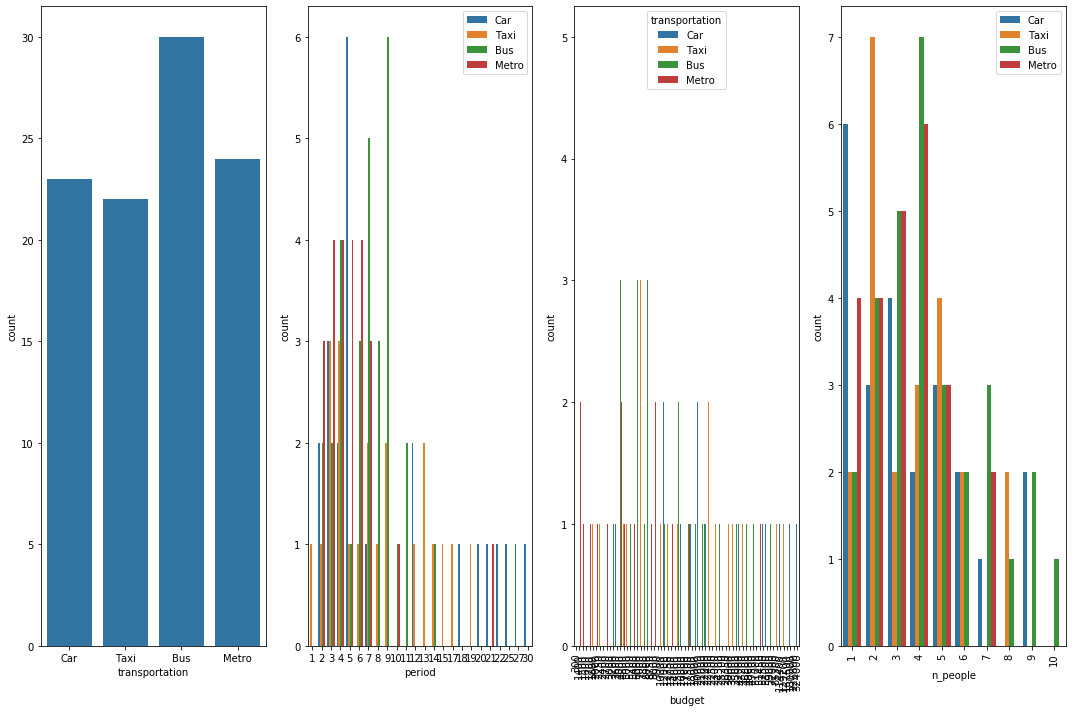

In [438]:
plt.figure(figsize=[15,10])
plt.subplot(1,4,1)
sb.countplot(data = data, x = 'transportation', color = sb.color_palette()[0])

plt.subplot(1,4,2)
sb.countplot(data = data, x = 'period', hue = 'transportation')
plt.legend(loc='upper right')

plt.subplot(1,4,3)
sb.countplot(data = data, x = 'budget', hue = 'transportation')
plt.xticks(rotation = 90)

plt.subplot(1,4,4)
sb.countplot(data = data, x = 'n_people', hue = 'transportation')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.legend(loc='upper right')



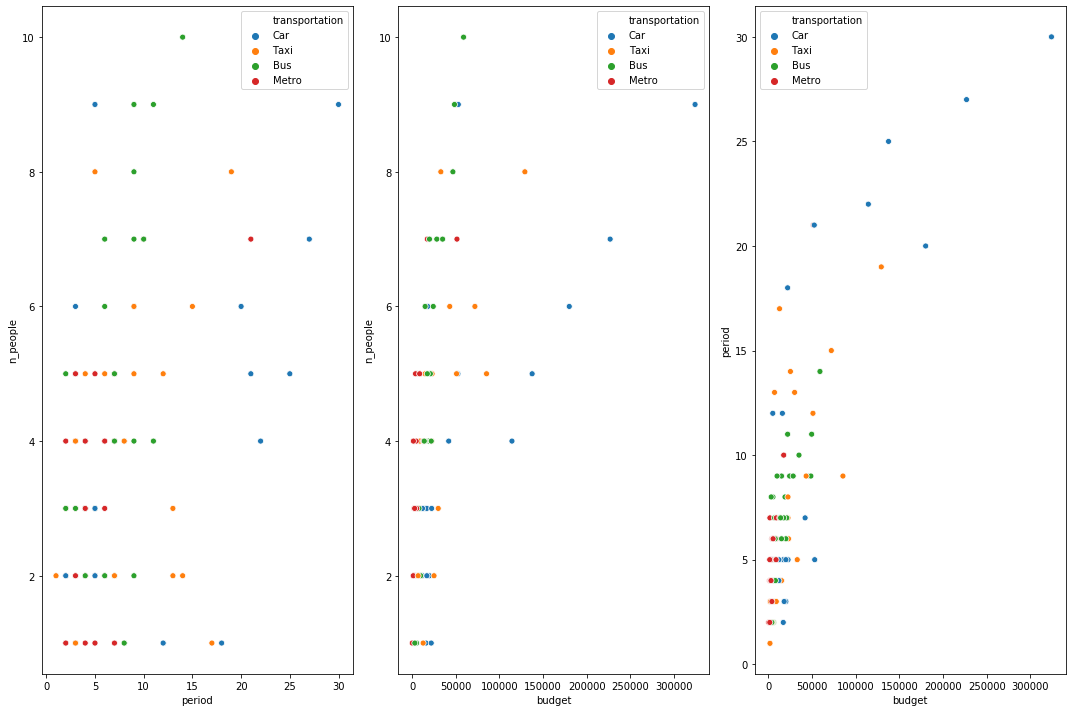

In [439]:
plt.figure(figsize=[15,10])

plt.subplot(1, 3, 1)
sb.scatterplot(data = data, x = 'period', y = 'n_people', hue = 'transportation')
plt.xlabel('period')
plt.ylabel('n_people')
plt.legend(loc='best')

plt.subplot(1, 3, 2)
sb.scatterplot(data = data, x = 'budget', y = 'n_people', hue = 'transportation')
plt.xlabel('budget')
plt.ylabel('n_people')
plt.legend(loc='best')

plt.subplot(1, 3, 3)
sb.scatterplot(data = data, x = 'budget', y = 'period', hue = 'transportation')
plt.xlabel('budget')
plt.ylabel('period')
plt.legend(loc='best')

plt.tight_layout()

In [441]:
# pickle_in = open("trans_model.pickle", "rb")
# model = pickle.load(pickle_in)
# names = ["Taxi", "Bus", "Car", "Metro"]
# dt = pd.read_csv("input.csv")

# x = list(zip(np.array(dt["budget"]), np.array(dt["period"]), np.array(dt["n_people"])))

# #preprocessing test dataset
# test_scaled = scaler.fit_transform(x)
# test = pd.DataFrame(test_scaled)

# #predicting on the test set and creating submission file

# p = model.predict(test)


# print(names[p[0]])
# test